In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# 1. 데이터 불러오기 및 Minmax scaler제작

In [2]:
header = pd.read_csv('./Header.csv')
# 처음부터 다시 데이터를 만들 것인가?
New_load_DB = False

if New_load_DB:
    for _ in os.listdir('./Total_DB/'):
        DB = pd.DataFrame(np.loadtxt('./Total_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
        header = pd.concat((header, DB))
else:
    header = pd.DataFrame(pd.read_csv('tot_db.csv'), columns=header.columns)

## 1.1 전체 데이터를 통하여 Minmax scaler 제작

In [3]:
des = header.describe()
des

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
count,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,...,244982.000000,244982.000000,244982.000000,2.449820e+05,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000
mean,0.026071,0.045728,0.0,0.093922,0.045728,0.093922,0.498314,0.0,0.093922,0.973101,...,6.951259,6.779299,6.441462,-2.926887e+02,24.804459,4.273166,0.597258,-8.608793,0.947179,240.628243
std,0.123582,0.207692,0.0,0.290862,0.207692,0.290862,0.499708,0.0,0.290862,0.093690,...,2.707714,2.714360,2.343627,2.772152e+04,34.091013,19.711357,0.727222,2.146046,1.384936,48.185374
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.440000,-0.780000,-0.560000,-4.988283e+06,-6.730000,0.000000,0.000000,-11.000000,0.000000,51.330000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.960000,...,4.940000,4.890000,4.930000,-3.000000e-01,-0.650000,0.000000,0.000000,-11.000000,0.000000,218.582500
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,6.010000,6.060000,5.630000,-2.000000e-02,10.550000,0.000000,0.330000,-8.810000,0.000000,259.070000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,...,8.650000,8.380000,7.550000,-0.000000e+00,39.930000,0.020000,0.890000,-7.010000,1.920000,268.380000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,18.750000,15.600000,13.630000,5.210000e+00,200.280000,103.170000,4.390000,-3.340000,4.350000,326.200000


In [4]:
Tot_minmax = des.loc[['min', 'max']] # 전체 변수에 대한 minmax값
Tot_minmax

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.44,-0.78,-0.56,-4988283.00,-6.73,0.00,0.00,-11.00,0.00,51.33
max,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,18.75,15.60,13.63,5.21,200.28,103.17,4.39,-3.34,4.35,326.20


In [5]:
# MinmaxScaler를 활용한 노멀라이제이션
scaler = MinMaxScaler()
scaler.fit(Tot_minmax)
norm_db = scaler.transform(header.values)
norm_db.shape

(244982, 168)

## 1.2 제작된 Minmax scaler를 사용하여 전체 데이터 정규화 검증

In [6]:
norm_db = pd.DataFrame(norm_db, columns=header.columns)
norm_db.head()

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
0,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120622,0.967045,0.0,0.998695,0.0,0.997854
1,0.57,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120526,0.966754,0.0,0.998695,0.0,0.997926
2,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.121105,0.969759,0.0,0.998695,0.0,0.997599
3,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.120815,0.970243,0.0,0.998695,0.0,0.997417
4,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.943622,0.999999,0.120960,0.969177,0.0,0.998695,0.0,0.997490


# 2. 훈련용 및 검증용 데이터 작성

In [7]:
all_db_load = False

# 선택할 변수 선정
input_value = ['BHV311', 'BPSV10', 'BPSV5', 'BV102', 'BV202', 'BV302', 'KCHRGP1', 'KCHRGP3', 'KCTMTSP', 'KLAMPO121',
               'KLAMPO123', 'KLAMPO47', 'KSWO125', 'WPRZSV', 'ZSGW1', 'ZSGW2', 'ZSGW3', 'KBCDO23', 'KZBANK1', 'KZBANK2', 
               'KZBANK3', 'KZBANK4', 'KZBANK5', 'KZBANK6', 'KZBANK7', 'KZBANK8', 'QPROREL', 'QPRZB', 'QPRZP', 'UAVLEG1', 
               'UAVLEG2', 'UAVLEG3', 'UAVLEGM', 'UCOLEG1', 'UCOLEG2', 'UCOLEG3', 'UHOLEG1', 'UHOLEG2', 'UHOLEG3', 'WACCA', 
               'WACCB', 'WHV22', 'WSPRAY', 'WSPRCS1', 'WSPRCS2', 'WSTM1', 'WSTM2', 'WSTM3', 'ZINST101', 'ZINST22', 'ZINST25', 
               'ZINST26', 'ZINST42', 'ZINST56', 'ZINST57', 'ZINST58', 'ZINST62', 'ZINST65', 'ZINST66', 'ZINST70', 'ZINST71', 
               'ZINST72', 'ZINST73', 'ZINST74', 'ZINST75', 'ZINST76', 'ZINST77', 'ZINST78', 'ZINST89', 'ZINST91', 'ZINST92', 
               'ZINST93', 'ZINST94', 'ZINST95', 'ZINST96', 'ZINST99', 'ZPRZ', 'ZREAC']
output_value = ['BFV122', 'BHV1', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV614',
                'BLV615', 'BPORV', 'BPRZSP', 'BV101', 'BV201', 'BV301', 'KAFWP1', 'KAFWP2', 'KAFWP3', 'KBHON',
                'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124', 'KLAMPO125', 'KLAMPO126',
                'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO', 'KOHV22', 'KOLV615', 'KPBHM',
                 'KRXTRIP', 'KSWO120']

input_length = 10
Norm_DB_input_train_DB = []
Norm_DB_output_train_DB = []

Norm_DB_input_test_DB = []
Norm_DB_output_test_DB = []

for _ in os.listdir('./Train_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Train_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    # 출력 데이터에서 조절가능한 변수와 on/off인 변수를 분할.
    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

    temp = pd.DataFrame()

    for _ in output_value_onoff:
        temp['{}_On'.format(_)] = Norm_DB_output[_] >= 0.5
        temp['{}_Off'.format(_)] = Norm_DB_output[_] <= 0.5

    mappint_word = {
        True: 1,
        False: 0
    }
    for _ in temp.columns:
        temp[_] = temp[_].map(mappint_word)

    for _ in output_value_reg:
        temp[_] = Norm_DB_output[_]
    
    Norm_DB_output = temp
    print(Norm_DB_output.shape)
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_train_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_train_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break
        
for _ in os.listdir('./Test_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Test_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    
    # 출력 데이터에서 조절가능한 변수와 on/off인 변수를 분할.
    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

    temp = pd.DataFrame()

    for _ in output_value_onoff:
        temp['{}_On'.format(_)] = Norm_DB_output[_] >= 0.5
        temp['{}_Off'.format(_)] = Norm_DB_output[_] <= 0.5

    mappint_word = {
        True: 1,
        False: 0
    }
    for _ in temp.columns:
        temp[_] = temp[_].map(mappint_word)

    for _ in output_value_reg:
        temp[_] = Norm_DB_output[_]
    
    Norm_DB_output = temp
    print(Norm_DB_output.shape)
    
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_test_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_test_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break

(2074, 74)
단일 데이터만 읽었습니다.
(865, 74)
단일 데이터만 읽었습니다.


# 3. 네트워크 훈련 및 구축

## 3.1 On/off 변수를 처리하는 네트워크(on/off network) 구축

In [8]:
import tensorflow as tf
import numpy as np

Shape_trina_DB = np.shape(Norm_DB_input_train_DB) # (None, 10, 78)

# 1 on/off 분류 모델
input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,35):
    out_layer.append(tf.keras.layers.Dense(2, activation='softmax')(model))

fin_model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model.summary()

fin_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 78)       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 32)           72224       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            66          sequential[0][0]                 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            66          sequential[0][0]                 
__________________________________________________________________________________________________
dense_3 (D

## 3.2 조절이 필요한 변수를 처리하는 네트워크(reg network) 구축

In [9]:
# 2 변동성 벨브의 모델
input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,1):
    out_layer.append(tf.keras.layers.Dense(6)(model))

fin_model_2 = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model_2.summary()

fin_model_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10, 78)            0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                72224     
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 198       
Total params: 72,422
Trainable params: 72,422
Non-trainable params: 0
_________________________________________________________________


## 3.3 개별적 네트워크에 사용하도록 훈련용 데이터 재구축 및 분할

In [10]:
Norm_DB_output_train_DB = pd.DataFrame(Norm_DB_output_train_DB, columns=temp.columns)
Norm_DB_output_train_DB.head()

,BHV1_On,BHV1_Off,BHV108_On,BHV108_Off,BHV2_On,BHV2_Off,BHV208_On,BHV208_Off,BHV22_On,BHV22_Off,...,KRXTRIP_On,KRXTRIP_Off,KSWO120_On,KSWO120_Off,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.956044,0.21,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.20,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.18,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.17,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.934066,0.15,0.0,0.0,0.0


In [11]:
## On/off 변수의 출력 output 작성
on_off_value = []

output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    
for _ in output_value_onoff:
    on_off_value.append(Norm_DB_output_train_DB[['{}_On'.format(_),'{}_Off'.format(_)]].values)
np.shape(on_off_value)

(35, 2063, 2)

In [12]:
## 변동성 변수의 출력 output 작성
output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

reg_value = Norm_DB_output_train_DB[['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']].values
np.shape(reg_value)

(2063, 6)

## 3.4 네트워크 훈련

In [13]:
tot_out_on_off, tot_out_reg = [], []

for training_step in range(0, 500):
    # 1 step 훈련
    hist = fin_model.fit([Norm_DB_input_train_DB], on_off_value, epochs=1, batch_size=100)
    hist2 = fin_model_2.fit([Norm_DB_input_train_DB], [reg_value], epochs=1, batch_size=100)
    # 1 step 훈련 후 검증 데이터를 통한 검증후 저장
    tot_out_on_off.append(fin_model.predict([Norm_DB_input_test_DB]))
    tot_out_reg.append(fin_model_2.predict([Norm_DB_input_test_DB]))

Epoch 1/1
2063/2063 [==============================] - 11s 5ms/step - loss: 18.5830 - dense_1_loss: 0.3835 - dense_2_loss: 0.6756 - dense_3_loss: 0.8793 - dense_4_loss: 0.4055 - dense_5_loss: 0.2959 - dense_6_loss: 0.6567 - dense_7_loss: 0.3669 - dense_8_loss: 0.7073 - dense_9_loss: 0.4451 - dense_10_loss: 0.4818 - dense_11_loss: 0.5085 - dense_12_loss: 0.4326 - dense_13_loss: 0.3487 - dense_14_loss: 0.6378 - dense_15_loss: 0.5259 - dense_16_loss: 0.3162 - dense_17_loss: 0.4990 - dense_18_loss: 0.3367 - dense_19_loss: 0.2999 - dense_20_loss: 0.6971 - dense_21_loss: 0.4502 - dense_22_loss: 0.7162 - dense_23_loss: 0.9066 - dense_24_loss: 0.7207 - dense_25_loss: 0.6019 - dense_26_loss: 0.3835 - dense_27_loss: 0.5243 - dense_28_loss: 0.2806 - dense_29_loss: 0.3799 - dense_30_loss: 0.4412 - dense_31_loss: 0.3584 - dense_32_loss: 0.9052 - dense_33_loss: 0.9197 - dense_34_loss: 0.4660 - dense_35_loss: 0.6287 - dense_1_acc: 0.8677 - dense_2_acc: 0.5739 - dense_3_acc: 0.3349 - dense_4_acc: 0.82

2063/2063 [==============================] - 1s 497us/step - loss: 2.5110 - dense_1_loss: 0.0210 - dense_2_loss: 0.0663 - dense_3_loss: 0.0640 - dense_4_loss: 0.0163 - dense_5_loss: 0.0368 - dense_6_loss: 0.0488 - dense_7_loss: 0.0520 - dense_8_loss: 0.1821 - dense_9_loss: 0.0226 - dense_10_loss: 0.0247 - dense_11_loss: 0.2494 - dense_12_loss: 0.0247 - dense_13_loss: 0.0366 - dense_14_loss: 0.0315 - dense_15_loss: 0.1165 - dense_16_loss: 0.0141 - dense_17_loss: 0.0348 - dense_18_loss: 0.0135 - dense_19_loss: 0.0137 - dense_20_loss: 0.0539 - dense_21_loss: 0.2038 - dense_22_loss: 0.1405 - dense_23_loss: 0.3106 - dense_24_loss: 0.1349 - dense_25_loss: 0.0183 - dense_26_loss: 0.0257 - dense_27_loss: 0.0391 - dense_28_loss: 0.0133 - dense_29_loss: 0.0219 - dense_30_loss: 0.0385 - dense_31_loss: 0.0156 - dense_32_loss: 0.0413 - dense_33_loss: 0.1687 - dense_34_loss: 0.0470 - dense_35_loss: 0.1687 - dense_1_acc: 0.9932 - dense_2_acc: 0.9748 - dense_3_acc: 0.9811 - dense_4_acc: 0.9971 - dense

2063/2063 [==============================] - 1s 513us/step - loss: 1.5696 - dense_1_loss: 0.0099 - dense_2_loss: 0.0416 - dense_3_loss: 0.0436 - dense_4_loss: 0.0092 - dense_5_loss: 0.0238 - dense_6_loss: 0.0172 - dense_7_loss: 0.0295 - dense_8_loss: 0.1467 - dense_9_loss: 0.0084 - dense_10_loss: 0.0104 - dense_11_loss: 0.1716 - dense_12_loss: 0.0178 - dense_13_loss: 0.0205 - dense_14_loss: 0.0106 - dense_15_loss: 0.0866 - dense_16_loss: 0.0072 - dense_17_loss: 0.0131 - dense_18_loss: 0.0059 - dense_19_loss: 0.0072 - dense_20_loss: 0.0188 - dense_21_loss: 0.1632 - dense_22_loss: 0.0930 - dense_23_loss: 0.2220 - dense_24_loss: 0.0773 - dense_25_loss: 0.0109 - dense_26_loss: 0.0092 - dense_27_loss: 0.0207 - dense_28_loss: 0.0089 - dense_29_loss: 0.0120 - dense_30_loss: 0.0232 - dense_31_loss: 0.0072 - dense_32_loss: 0.0180 - dense_33_loss: 0.0917 - dense_34_loss: 0.0292 - dense_35_loss: 0.0837 - dense_1_acc: 0.9971 - dense_2_acc: 0.9821 - dense_3_acc: 0.9855 - dense_4_acc: 0.9981 - dense

2063/2063 [==============================] - 1s 506us/step - loss: 1.3696 - dense_1_loss: 0.0066 - dense_2_loss: 0.0246 - dense_3_loss: 0.0272 - dense_4_loss: 0.0050 - dense_5_loss: 0.0172 - dense_6_loss: 0.0156 - dense_7_loss: 0.0236 - dense_8_loss: 0.1584 - dense_9_loss: 0.0070 - dense_10_loss: 0.0059 - dense_11_loss: 0.1335 - dense_12_loss: 0.0111 - dense_13_loss: 0.0192 - dense_14_loss: 0.0113 - dense_15_loss: 0.0812 - dense_16_loss: 0.0081 - dense_17_loss: 0.0101 - dense_18_loss: 0.0059 - dense_19_loss: 0.0047 - dense_20_loss: 0.0125 - dense_21_loss: 0.1214 - dense_22_loss: 0.1119 - dense_23_loss: 0.2229 - dense_24_loss: 0.1081 - dense_25_loss: 0.0055 - dense_26_loss: 0.0077 - dense_27_loss: 0.0184 - dense_28_loss: 0.0051 - dense_29_loss: 0.0091 - dense_30_loss: 0.0156 - dense_31_loss: 0.0045 - dense_32_loss: 0.0114 - dense_33_loss: 0.0610 - dense_34_loss: 0.0253 - dense_35_loss: 0.0529 - dense_1_acc: 0.9981 - dense_2_acc: 0.9918 - dense_3_acc: 0.9898 - dense_4_acc: 0.9990 - dense

2063/2063 [==============================] - 1s 577us/step - loss: 1.0240 - dense_1_loss: 0.0048 - dense_2_loss: 0.0185 - dense_3_loss: 0.0216 - dense_4_loss: 0.0065 - dense_5_loss: 0.0096 - dense_6_loss: 0.0096 - dense_7_loss: 0.0206 - dense_8_loss: 0.0995 - dense_9_loss: 0.0066 - dense_10_loss: 0.0086 - dense_11_loss: 0.1263 - dense_12_loss: 0.0076 - dense_13_loss: 0.0226 - dense_14_loss: 0.0066 - dense_15_loss: 0.0677 - dense_16_loss: 0.0037 - dense_17_loss: 0.0071 - dense_18_loss: 0.0035 - dense_19_loss: 0.0042 - dense_20_loss: 0.0094 - dense_21_loss: 0.1014 - dense_22_loss: 0.0730 - dense_23_loss: 0.1563 - dense_24_loss: 0.0614 - dense_25_loss: 0.0050 - dense_26_loss: 0.0049 - dense_27_loss: 0.0150 - dense_28_loss: 0.0033 - dense_29_loss: 0.0069 - dense_30_loss: 0.0141 - dense_31_loss: 0.0050 - dense_32_loss: 0.0107 - dense_33_loss: 0.0527 - dense_34_loss: 0.0149 - dense_35_loss: 0.0349 - dense_1_acc: 0.9981 - dense_2_acc: 0.9947 - dense_3_acc: 0.9956 - dense_4_acc: 0.9981 - dense

2063/2063 [==============================] - 1s 547us/step - loss: 0.8709 - dense_1_loss: 0.0048 - dense_2_loss: 0.0219 - dense_3_loss: 0.0154 - dense_4_loss: 0.0058 - dense_5_loss: 0.0116 - dense_6_loss: 0.0107 - dense_7_loss: 0.0136 - dense_8_loss: 0.0869 - dense_9_loss: 0.0061 - dense_10_loss: 0.0073 - dense_11_loss: 0.1063 - dense_12_loss: 0.0075 - dense_13_loss: 0.0249 - dense_14_loss: 0.0051 - dense_15_loss: 0.0751 - dense_16_loss: 0.0054 - dense_17_loss: 0.0048 - dense_18_loss: 0.0036 - dense_19_loss: 0.0029 - dense_20_loss: 0.0083 - dense_21_loss: 0.0601 - dense_22_loss: 0.0635 - dense_23_loss: 0.1127 - dense_24_loss: 0.0497 - dense_25_loss: 0.0056 - dense_26_loss: 0.0035 - dense_27_loss: 0.0189 - dense_28_loss: 0.0030 - dense_29_loss: 0.0037 - dense_30_loss: 0.0141 - dense_31_loss: 0.0029 - dense_32_loss: 0.0075 - dense_33_loss: 0.0422 - dense_34_loss: 0.0146 - dense_35_loss: 0.0406 - dense_1_acc: 0.9985 - dense_2_acc: 0.9927 - dense_3_acc: 0.9952 - dense_4_acc: 0.9985 - dense

2063/2063 [==============================] - 1s 506us/step - loss: 0.7196 - dense_1_loss: 0.0020 - dense_2_loss: 0.0157 - dense_3_loss: 0.0185 - dense_4_loss: 0.0050 - dense_5_loss: 0.0134 - dense_6_loss: 0.0068 - dense_7_loss: 0.0132 - dense_8_loss: 0.0693 - dense_9_loss: 0.0046 - dense_10_loss: 0.0037 - dense_11_loss: 0.1075 - dense_12_loss: 0.0078 - dense_13_loss: 0.0167 - dense_14_loss: 0.0068 - dense_15_loss: 0.0664 - dense_16_loss: 0.0028 - dense_17_loss: 0.0072 - dense_18_loss: 0.0052 - dense_19_loss: 0.0045 - dense_20_loss: 0.0079 - dense_21_loss: 0.0471 - dense_22_loss: 0.0466 - dense_23_loss: 0.0852 - dense_24_loss: 0.0334 - dense_25_loss: 0.0058 - dense_26_loss: 0.0054 - dense_27_loss: 0.0085 - dense_28_loss: 0.0055 - dense_29_loss: 0.0058 - dense_30_loss: 0.0081 - dense_31_loss: 0.0039 - dense_32_loss: 0.0085 - dense_33_loss: 0.0263 - dense_34_loss: 0.0183 - dense_35_loss: 0.0262 - dense_1_acc: 1.0000 - dense_2_acc: 0.9937 - dense_3_acc: 0.9942 - dense_4_acc: 0.9985 - dense

2063/2063 [==============================] - 1s 498us/step - loss: 0.9591 - dense_1_loss: 0.0031 - dense_2_loss: 0.0132 - dense_3_loss: 0.0141 - dense_4_loss: 0.0036 - dense_5_loss: 0.0093 - dense_6_loss: 0.0061 - dense_7_loss: 0.0129 - dense_8_loss: 0.1087 - dense_9_loss: 0.0036 - dense_10_loss: 0.0033 - dense_11_loss: 0.1051 - dense_12_loss: 0.0061 - dense_13_loss: 0.0159 - dense_14_loss: 0.0043 - dense_15_loss: 0.0492 - dense_16_loss: 0.0025 - dense_17_loss: 0.0031 - dense_18_loss: 0.0025 - dense_19_loss: 0.0042 - dense_20_loss: 0.0046 - dense_21_loss: 0.1284 - dense_22_loss: 0.0869 - dense_23_loss: 0.1858 - dense_24_loss: 0.0719 - dense_25_loss: 0.0049 - dense_26_loss: 0.0033 - dense_27_loss: 0.0110 - dense_28_loss: 0.0029 - dense_29_loss: 0.0039 - dense_30_loss: 0.0098 - dense_31_loss: 0.0038 - dense_32_loss: 0.0074 - dense_33_loss: 0.0222 - dense_34_loss: 0.0181 - dense_35_loss: 0.0232 - dense_1_acc: 0.9995 - dense_2_acc: 0.9956 - dense_3_acc: 0.9961 - dense_4_acc: 0.9995 - dense

2063/2063 [==============================] - 1s 500us/step - loss: 0.8074 - dense_1_loss: 0.0041 - dense_2_loss: 0.0151 - dense_3_loss: 0.0118 - dense_4_loss: 0.0067 - dense_5_loss: 0.0105 - dense_6_loss: 0.0066 - dense_7_loss: 0.0099 - dense_8_loss: 0.0631 - dense_9_loss: 0.0051 - dense_10_loss: 0.0074 - dense_11_loss: 0.1049 - dense_12_loss: 0.0036 - dense_13_loss: 0.0225 - dense_14_loss: 0.0025 - dense_15_loss: 0.0457 - dense_16_loss: 0.0038 - dense_17_loss: 0.0031 - dense_18_loss: 0.0022 - dense_19_loss: 0.0017 - dense_20_loss: 0.0032 - dense_21_loss: 0.1031 - dense_22_loss: 0.0581 - dense_23_loss: 0.1618 - dense_24_loss: 0.0512 - dense_25_loss: 0.0026 - dense_26_loss: 0.0028 - dense_27_loss: 0.0064 - dense_28_loss: 0.0021 - dense_29_loss: 0.0031 - dense_30_loss: 0.0115 - dense_31_loss: 0.0022 - dense_32_loss: 0.0045 - dense_33_loss: 0.0246 - dense_34_loss: 0.0141 - dense_35_loss: 0.0255 - dense_1_acc: 0.9990 - dense_2_acc: 0.9937 - dense_3_acc: 0.9971 - dense_4_acc: 0.9990 - dense

2063/2063 [==============================] - 1s 501us/step - loss: 0.7231 - dense_1_loss: 0.0049 - dense_2_loss: 0.0115 - dense_3_loss: 0.0102 - dense_4_loss: 0.0049 - dense_5_loss: 0.0065 - dense_6_loss: 0.0061 - dense_7_loss: 0.0105 - dense_8_loss: 0.0612 - dense_9_loss: 0.0050 - dense_10_loss: 0.0036 - dense_11_loss: 0.0905 - dense_12_loss: 0.0050 - dense_13_loss: 0.0160 - dense_14_loss: 0.0022 - dense_15_loss: 0.0518 - dense_16_loss: 0.0045 - dense_17_loss: 0.0032 - dense_18_loss: 0.0026 - dense_19_loss: 0.0024 - dense_20_loss: 0.0046 - dense_21_loss: 0.0931 - dense_22_loss: 0.0489 - dense_23_loss: 0.1248 - dense_24_loss: 0.0423 - dense_25_loss: 0.0046 - dense_26_loss: 0.0033 - dense_27_loss: 0.0088 - dense_28_loss: 0.0034 - dense_29_loss: 0.0035 - dense_30_loss: 0.0090 - dense_31_loss: 0.0025 - dense_32_loss: 0.0059 - dense_33_loss: 0.0264 - dense_34_loss: 0.0168 - dense_35_loss: 0.0227 - dense_1_acc: 0.9981 - dense_2_acc: 0.9966 - dense_3_acc: 0.9976 - dense_4_acc: 0.9985 - dense

2063/2063 [==============================] - 1s 489us/step - loss: 0.6587 - dense_1_loss: 0.0014 - dense_2_loss: 0.0085 - dense_3_loss: 0.0090 - dense_4_loss: 0.0014 - dense_5_loss: 0.0076 - dense_6_loss: 0.0040 - dense_7_loss: 0.0093 - dense_8_loss: 0.0692 - dense_9_loss: 0.0023 - dense_10_loss: 0.0023 - dense_11_loss: 0.0948 - dense_12_loss: 0.0044 - dense_13_loss: 0.0178 - dense_14_loss: 0.0043 - dense_15_loss: 0.0442 - dense_16_loss: 0.0025 - dense_17_loss: 0.0047 - dense_18_loss: 0.0024 - dense_19_loss: 0.0028 - dense_20_loss: 0.0042 - dense_21_loss: 0.0386 - dense_22_loss: 0.0607 - dense_23_loss: 0.0960 - dense_24_loss: 0.0479 - dense_25_loss: 0.0043 - dense_26_loss: 0.0025 - dense_27_loss: 0.0136 - dense_28_loss: 0.0032 - dense_29_loss: 0.0041 - dense_30_loss: 0.0099 - dense_31_loss: 0.0023 - dense_32_loss: 0.0066 - dense_33_loss: 0.0303 - dense_34_loss: 0.0143 - dense_35_loss: 0.0273 - dense_1_acc: 0.9995 - dense_2_acc: 0.9966 - dense_3_acc: 0.9971 - dense_4_acc: 1.0000 - dense

2063/2063 [==============================] - 1s 497us/step - loss: 0.6122 - dense_1_loss: 0.0029 - dense_2_loss: 0.0121 - dense_3_loss: 0.0098 - dense_4_loss: 0.0067 - dense_5_loss: 0.0072 - dense_6_loss: 0.0042 - dense_7_loss: 0.0085 - dense_8_loss: 0.0635 - dense_9_loss: 0.0026 - dense_10_loss: 0.0053 - dense_11_loss: 0.0821 - dense_12_loss: 0.0028 - dense_13_loss: 0.0194 - dense_14_loss: 0.0017 - dense_15_loss: 0.0480 - dense_16_loss: 0.0020 - dense_17_loss: 0.0022 - dense_18_loss: 0.0013 - dense_19_loss: 0.0011 - dense_20_loss: 0.0023 - dense_21_loss: 0.0345 - dense_22_loss: 0.0575 - dense_23_loss: 0.0847 - dense_24_loss: 0.0502 - dense_25_loss: 0.0016 - dense_26_loss: 0.0021 - dense_27_loss: 0.0080 - dense_28_loss: 8.9531e-04 - dense_29_loss: 0.0019 - dense_30_loss: 0.0062 - dense_31_loss: 0.0015 - dense_32_loss: 0.0051 - dense_33_loss: 0.0319 - dense_34_loss: 0.0122 - dense_35_loss: 0.0283 - dense_1_acc: 0.9985 - dense_2_acc: 0.9952 - dense_3_acc: 0.9961 - dense_4_acc: 0.9981 - d

2063/2063 [==============================] - 1s 495us/step - loss: 0.5622 - dense_1_loss: 0.0036 - dense_2_loss: 0.0091 - dense_3_loss: 0.0106 - dense_4_loss: 0.0062 - dense_5_loss: 0.0055 - dense_6_loss: 0.0083 - dense_7_loss: 0.0063 - dense_8_loss: 0.0542 - dense_9_loss: 0.0050 - dense_10_loss: 0.0044 - dense_11_loss: 0.0820 - dense_12_loss: 0.0027 - dense_13_loss: 0.0244 - dense_14_loss: 0.0033 - dense_15_loss: 0.0442 - dense_16_loss: 0.0023 - dense_17_loss: 0.0031 - dense_18_loss: 0.0019 - dense_19_loss: 0.0012 - dense_20_loss: 0.0036 - dense_21_loss: 0.0297 - dense_22_loss: 0.0497 - dense_23_loss: 0.0646 - dense_24_loss: 0.0472 - dense_25_loss: 0.0024 - dense_26_loss: 0.0027 - dense_27_loss: 0.0102 - dense_28_loss: 0.0021 - dense_29_loss: 0.0022 - dense_30_loss: 0.0066 - dense_31_loss: 0.0017 - dense_32_loss: 0.0054 - dense_33_loss: 0.0216 - dense_34_loss: 0.0145 - dense_35_loss: 0.0197 - dense_1_acc: 0.9995 - dense_2_acc: 0.9976 - dense_3_acc: 0.9966 - dense_4_acc: 0.9976 - dense

2063/2063 [==============================] - 1s 506us/step - loss: 0.5814 - dense_1_loss: 0.0041 - dense_2_loss: 0.0103 - dense_3_loss: 0.0081 - dense_4_loss: 0.0049 - dense_5_loss: 0.0059 - dense_6_loss: 0.0085 - dense_7_loss: 0.0066 - dense_8_loss: 0.0498 - dense_9_loss: 0.0049 - dense_10_loss: 0.0049 - dense_11_loss: 0.0888 - dense_12_loss: 0.0021 - dense_13_loss: 0.0188 - dense_14_loss: 0.0020 - dense_15_loss: 0.0424 - dense_16_loss: 0.0016 - dense_17_loss: 0.0019 - dense_18_loss: 0.0010 - dense_19_loss: 0.0022 - dense_20_loss: 0.0033 - dense_21_loss: 0.0548 - dense_22_loss: 0.0403 - dense_23_loss: 0.0833 - dense_24_loss: 0.0332 - dense_25_loss: 0.0023 - dense_26_loss: 0.0012 - dense_27_loss: 0.0093 - dense_28_loss: 0.0016 - dense_29_loss: 0.0024 - dense_30_loss: 0.0063 - dense_31_loss: 0.0016 - dense_32_loss: 0.0048 - dense_33_loss: 0.0284 - dense_34_loss: 0.0130 - dense_35_loss: 0.0269 - dense_1_acc: 0.9990 - dense_2_acc: 0.9966 - dense_3_acc: 0.9976 - dense_4_acc: 0.9985 - dense

2063/2063 [==============================] - 1s 495us/step - loss: 0.5415 - dense_1_loss: 0.0035 - dense_2_loss: 0.0049 - dense_3_loss: 0.0069 - dense_4_loss: 0.0026 - dense_5_loss: 0.0065 - dense_6_loss: 0.0029 - dense_7_loss: 0.0067 - dense_8_loss: 0.0457 - dense_9_loss: 0.0038 - dense_10_loss: 0.0032 - dense_11_loss: 0.0749 - dense_12_loss: 0.0029 - dense_13_loss: 0.0189 - dense_14_loss: 0.0013 - dense_15_loss: 0.0407 - dense_16_loss: 0.0013 - dense_17_loss: 0.0022 - dense_18_loss: 0.0010 - dense_19_loss: 0.0017 - dense_20_loss: 0.0029 - dense_21_loss: 0.0474 - dense_22_loss: 0.0484 - dense_23_loss: 0.0833 - dense_24_loss: 0.0392 - dense_25_loss: 0.0021 - dense_26_loss: 0.0024 - dense_27_loss: 0.0065 - dense_28_loss: 0.0015 - dense_29_loss: 0.0026 - dense_30_loss: 0.0048 - dense_31_loss: 0.0011 - dense_32_loss: 0.0026 - dense_33_loss: 0.0289 - dense_34_loss: 0.0138 - dense_35_loss: 0.0224 - dense_1_acc: 0.9990 - dense_2_acc: 0.9985 - dense_3_acc: 0.9976 - dense_4_acc: 0.9995 - dense

2063/2063 [==============================] - 1s 497us/step - loss: 0.6139 - dense_1_loss: 0.0059 - dense_2_loss: 0.0089 - dense_3_loss: 0.0074 - dense_4_loss: 0.0053 - dense_5_loss: 0.0062 - dense_6_loss: 0.0053 - dense_7_loss: 0.0069 - dense_8_loss: 0.0583 - dense_9_loss: 0.0064 - dense_10_loss: 0.0067 - dense_11_loss: 0.0805 - dense_12_loss: 0.0024 - dense_13_loss: 0.0141 - dense_14_loss: 0.0023 - dense_15_loss: 0.0304 - dense_16_loss: 0.0020 - dense_17_loss: 0.0016 - dense_18_loss: 0.0011 - dense_19_loss: 0.0019 - dense_20_loss: 0.0024 - dense_21_loss: 0.0390 - dense_22_loss: 0.0649 - dense_23_loss: 0.1038 - dense_24_loss: 0.0646 - dense_25_loss: 9.5156e-04 - dense_26_loss: 0.0022 - dense_27_loss: 0.0050 - dense_28_loss: 0.0018 - dense_29_loss: 0.0026 - dense_30_loss: 0.0086 - dense_31_loss: 0.0014 - dense_32_loss: 0.0030 - dense_33_loss: 0.0246 - dense_34_loss: 0.0132 - dense_35_loss: 0.0223 - dense_1_acc: 0.9990 - dense_2_acc: 0.9966 - dense_3_acc: 0.9976 - dense_4_acc: 0.9985 - d

2063/2063 [==============================] - 1s 502us/step - loss: 0.4927 - dense_1_loss: 0.0015 - dense_2_loss: 0.0097 - dense_3_loss: 0.0084 - dense_4_loss: 0.0026 - dense_5_loss: 0.0069 - dense_6_loss: 0.0035 - dense_7_loss: 0.0075 - dense_8_loss: 0.0503 - dense_9_loss: 0.0022 - dense_10_loss: 0.0026 - dense_11_loss: 0.0741 - dense_12_loss: 0.0026 - dense_13_loss: 0.0140 - dense_14_loss: 0.0035 - dense_15_loss: 0.0379 - dense_16_loss: 0.0010 - dense_17_loss: 0.0027 - dense_18_loss: 0.0017 - dense_19_loss: 0.0025 - dense_20_loss: 0.0019 - dense_21_loss: 0.0334 - dense_22_loss: 0.0386 - dense_23_loss: 0.0686 - dense_24_loss: 0.0315 - dense_25_loss: 0.0025 - dense_26_loss: 0.0015 - dense_27_loss: 0.0041 - dense_28_loss: 0.0019 - dense_29_loss: 0.0022 - dense_30_loss: 0.0062 - dense_31_loss: 0.0013 - dense_32_loss: 0.0033 - dense_33_loss: 0.0258 - dense_34_loss: 0.0101 - dense_35_loss: 0.0248 - dense_1_acc: 1.0000 - dense_2_acc: 0.9971 - dense_3_acc: 0.9971 - dense_4_acc: 0.9995 - dense

2063/2063 [==============================] - 1s 489us/step - loss: 0.5001 - dense_1_loss: 0.0016 - dense_2_loss: 0.0060 - dense_3_loss: 0.0088 - dense_4_loss: 0.0017 - dense_5_loss: 0.0056 - dense_6_loss: 0.0026 - dense_7_loss: 0.0061 - dense_8_loss: 0.0417 - dense_9_loss: 0.0016 - dense_10_loss: 0.0017 - dense_11_loss: 0.0758 - dense_12_loss: 0.0042 - dense_13_loss: 0.0161 - dense_14_loss: 0.0025 - dense_15_loss: 0.0364 - dense_16_loss: 0.0011 - dense_17_loss: 0.0033 - dense_18_loss: 0.0037 - dense_19_loss: 0.0051 - dense_20_loss: 0.0032 - dense_21_loss: 0.0397 - dense_22_loss: 0.0424 - dense_23_loss: 0.0736 - dense_24_loss: 0.0315 - dense_25_loss: 0.0039 - dense_26_loss: 0.0033 - dense_27_loss: 0.0059 - dense_28_loss: 0.0038 - dense_29_loss: 0.0037 - dense_30_loss: 0.0033 - dense_31_loss: 0.0029 - dense_32_loss: 0.0057 - dense_33_loss: 0.0194 - dense_34_loss: 0.0116 - dense_35_loss: 0.0206 - dense_1_acc: 0.9995 - dense_2_acc: 0.9976 - dense_3_acc: 0.9981 - dense_4_acc: 0.9995 - dense

2063/2063 [==============================] - 1s 497us/step - loss: 0.3882 - dense_1_loss: 0.0040 - dense_2_loss: 0.0118 - dense_3_loss: 0.0113 - dense_4_loss: 0.0049 - dense_5_loss: 0.0096 - dense_6_loss: 0.0080 - dense_7_loss: 0.0098 - dense_8_loss: 0.0393 - dense_9_loss: 0.0040 - dense_10_loss: 0.0047 - dense_11_loss: 0.0655 - dense_12_loss: 0.0017 - dense_13_loss: 0.0137 - dense_14_loss: 7.3497e-04 - dense_15_loss: 0.0242 - dense_16_loss: 0.0013 - dense_17_loss: 9.4599e-04 - dense_18_loss: 6.4223e-04 - dense_19_loss: 6.7745e-04 - dense_20_loss: 0.0013 - dense_21_loss: 0.0169 - dense_22_loss: 0.0361 - dense_23_loss: 0.0402 - dense_24_loss: 0.0243 - dense_25_loss: 0.0011 - dense_26_loss: 9.3038e-04 - dense_27_loss: 0.0068 - dense_28_loss: 6.5599e-04 - dense_29_loss: 0.0013 - dense_30_loss: 0.0087 - dense_31_loss: 0.0011 - dense_32_loss: 0.0011 - dense_33_loss: 0.0111 - dense_34_loss: 0.0094 - dense_35_loss: 0.0107 - dense_1_acc: 0.9995 - dense_2_acc: 0.9952 - dense_3_acc: 0.9952 - den

2063/2063 [==============================] - 1s 498us/step - loss: 0.4201 - dense_1_loss: 0.0075 - dense_2_loss: 0.0072 - dense_3_loss: 0.0078 - dense_4_loss: 0.0094 - dense_5_loss: 0.0061 - dense_6_loss: 0.0078 - dense_7_loss: 0.0076 - dense_8_loss: 0.0380 - dense_9_loss: 0.0076 - dense_10_loss: 0.0082 - dense_11_loss: 0.0767 - dense_12_loss: 0.0014 - dense_13_loss: 0.0162 - dense_14_loss: 8.6725e-04 - dense_15_loss: 0.0271 - dense_16_loss: 0.0030 - dense_17_loss: 0.0011 - dense_18_loss: 0.0011 - dense_19_loss: 7.9456e-04 - dense_20_loss: 0.0015 - dense_21_loss: 0.0118 - dense_22_loss: 0.0258 - dense_23_loss: 0.0365 - dense_24_loss: 0.0193 - dense_25_loss: 8.3927e-04 - dense_26_loss: 0.0020 - dense_27_loss: 0.0056 - dense_28_loss: 9.6474e-04 - dense_29_loss: 6.3673e-04 - dense_30_loss: 0.0077 - dense_31_loss: 0.0011 - dense_32_loss: 0.0023 - dense_33_loss: 0.0305 - dense_34_loss: 0.0090 - dense_35_loss: 0.0289 - dense_1_acc: 0.9990 - dense_2_acc: 0.9961 - dense_3_acc: 0.9971 - dense_4

2063/2063 [==============================] - 1s 497us/step - loss: 0.3755 - dense_1_loss: 0.0021 - dense_2_loss: 0.0066 - dense_3_loss: 0.0068 - dense_4_loss: 0.0019 - dense_5_loss: 0.0055 - dense_6_loss: 0.0028 - dense_7_loss: 0.0048 - dense_8_loss: 0.0356 - dense_9_loss: 0.0020 - dense_10_loss: 0.0023 - dense_11_loss: 0.0580 - dense_12_loss: 0.0016 - dense_13_loss: 0.0122 - dense_14_loss: 0.0012 - dense_15_loss: 0.0277 - dense_16_loss: 0.0021 - dense_17_loss: 0.0014 - dense_18_loss: 9.2810e-04 - dense_19_loss: 4.8446e-04 - dense_20_loss: 0.0022 - dense_21_loss: 0.0283 - dense_22_loss: 0.0356 - dense_23_loss: 0.0550 - dense_24_loss: 0.0298 - dense_25_loss: 0.0015 - dense_26_loss: 9.2028e-04 - dense_27_loss: 0.0053 - dense_28_loss: 5.7449e-04 - dense_29_loss: 9.0484e-04 - dense_30_loss: 0.0022 - dense_31_loss: 0.0015 - dense_32_loss: 0.0023 - dense_33_loss: 0.0112 - dense_34_loss: 0.0098 - dense_35_loss: 0.0123 - dense_1_acc: 0.9990 - dense_2_acc: 0.9985 - dense_3_acc: 0.9985 - dense_4

2063/2063 [==============================] - 1s 501us/step - loss: 0.3685 - dense_1_loss: 0.0011 - dense_2_loss: 0.0045 - dense_3_loss: 0.0052 - dense_4_loss: 0.0020 - dense_5_loss: 0.0038 - dense_6_loss: 0.0021 - dense_7_loss: 0.0034 - dense_8_loss: 0.0370 - dense_9_loss: 0.0021 - dense_10_loss: 0.0028 - dense_11_loss: 0.0665 - dense_12_loss: 0.0019 - dense_13_loss: 0.0159 - dense_14_loss: 0.0018 - dense_15_loss: 0.0306 - dense_16_loss: 4.8341e-04 - dense_17_loss: 8.4151e-04 - dense_18_loss: 0.0013 - dense_19_loss: 0.0016 - dense_20_loss: 0.0015 - dense_21_loss: 0.0112 - dense_22_loss: 0.0389 - dense_23_loss: 0.0429 - dense_24_loss: 0.0313 - dense_25_loss: 0.0022 - dense_26_loss: 0.0014 - dense_27_loss: 0.0042 - dense_28_loss: 6.6243e-04 - dense_29_loss: 0.0013 - dense_30_loss: 0.0048 - dense_31_loss: 0.0022 - dense_32_loss: 0.0022 - dense_33_loss: 0.0154 - dense_34_loss: 0.0095 - dense_35_loss: 0.0137 - dense_1_acc: 1.0000 - dense_2_acc: 0.9985 - dense_3_acc: 0.9985 - dense_4_acc: 0.

2063/2063 [==============================] - 1s 507us/step - loss: 0.3151 - dense_1_loss: 0.0029 - dense_2_loss: 0.0050 - dense_3_loss: 0.0062 - dense_4_loss: 0.0013 - dense_5_loss: 0.0042 - dense_6_loss: 0.0053 - dense_7_loss: 0.0051 - dense_8_loss: 0.0312 - dense_9_loss: 0.0027 - dense_10_loss: 0.0026 - dense_11_loss: 0.0577 - dense_12_loss: 9.9014e-04 - dense_13_loss: 0.0132 - dense_14_loss: 0.0018 - dense_15_loss: 0.0262 - dense_16_loss: 3.1717e-04 - dense_17_loss: 0.0020 - dense_18_loss: 0.0014 - dense_19_loss: 6.2022e-04 - dense_20_loss: 8.2036e-04 - dense_21_loss: 0.0154 - dense_22_loss: 0.0268 - dense_23_loss: 0.0348 - dense_24_loss: 0.0216 - dense_25_loss: 0.0013 - dense_26_loss: 0.0010 - dense_27_loss: 0.0054 - dense_28_loss: 6.4413e-04 - dense_29_loss: 6.9633e-04 - dense_30_loss: 0.0044 - dense_31_loss: 7.7594e-04 - dense_32_loss: 0.0016 - dense_33_loss: 0.0101 - dense_34_loss: 0.0084 - dense_35_loss: 0.0106 - dense_1_acc: 0.9990 - dense_2_acc: 0.9985 - dense_3_acc: 0.9981 -

2063/2063 [==============================] - 1s 502us/step - loss: 0.4434 - dense_1_loss: 0.0015 - dense_2_loss: 0.0046 - dense_3_loss: 0.0065 - dense_4_loss: 0.0013 - dense_5_loss: 0.0057 - dense_6_loss: 0.0026 - dense_7_loss: 0.0051 - dense_8_loss: 0.0411 - dense_9_loss: 0.0018 - dense_10_loss: 0.0018 - dense_11_loss: 0.0621 - dense_12_loss: 0.0037 - dense_13_loss: 0.0131 - dense_14_loss: 0.0042 - dense_15_loss: 0.0286 - dense_16_loss: 7.1130e-04 - dense_17_loss: 0.0042 - dense_18_loss: 0.0038 - dense_19_loss: 0.0041 - dense_20_loss: 0.0035 - dense_21_loss: 0.0202 - dense_22_loss: 0.0525 - dense_23_loss: 0.0557 - dense_24_loss: 0.0388 - dense_25_loss: 0.0046 - dense_26_loss: 0.0041 - dense_27_loss: 0.0046 - dense_28_loss: 0.0039 - dense_29_loss: 0.0050 - dense_30_loss: 0.0035 - dense_31_loss: 0.0034 - dense_32_loss: 0.0057 - dense_33_loss: 0.0155 - dense_34_loss: 0.0113 - dense_35_loss: 0.0146 - dense_1_acc: 0.9990 - dense_2_acc: 0.9990 - dense_3_acc: 0.9976 - dense_4_acc: 0.9995 - d

2063/2063 [==============================] - 1s 499us/step - loss: 0.5673 - dense_1_loss: 0.0027 - dense_2_loss: 0.0057 - dense_3_loss: 0.0067 - dense_4_loss: 0.0026 - dense_5_loss: 0.0054 - dense_6_loss: 0.0036 - dense_7_loss: 0.0058 - dense_8_loss: 0.0901 - dense_9_loss: 0.0025 - dense_10_loss: 0.0029 - dense_11_loss: 0.0817 - dense_12_loss: 0.0017 - dense_13_loss: 0.0100 - dense_14_loss: 0.0017 - dense_15_loss: 0.0184 - dense_16_loss: 3.7735e-04 - dense_17_loss: 0.0020 - dense_18_loss: 4.9806e-04 - dense_19_loss: 8.1347e-04 - dense_20_loss: 0.0018 - dense_21_loss: 0.0248 - dense_22_loss: 0.0739 - dense_23_loss: 0.0922 - dense_24_loss: 0.0673 - dense_25_loss: 0.0011 - dense_26_loss: 7.0821e-04 - dense_27_loss: 0.0090 - dense_28_loss: 8.1227e-04 - dense_29_loss: 7.1745e-04 - dense_30_loss: 0.0091 - dense_31_loss: 7.3030e-04 - dense_32_loss: 0.0019 - dense_33_loss: 0.0150 - dense_34_loss: 0.0096 - dense_35_loss: 0.0135 - dense_1_acc: 0.9995 - dense_2_acc: 0.9985 - dense_3_acc: 0.9976 -

2063/2063 [==============================] - 1s 489us/step - loss: 0.3394 - dense_1_loss: 0.0016 - dense_2_loss: 0.0061 - dense_3_loss: 0.0060 - dense_4_loss: 0.0011 - dense_5_loss: 0.0053 - dense_6_loss: 0.0019 - dense_7_loss: 0.0054 - dense_8_loss: 0.0358 - dense_9_loss: 0.0018 - dense_10_loss: 0.0016 - dense_11_loss: 0.0579 - dense_12_loss: 3.8338e-04 - dense_13_loss: 0.0115 - dense_14_loss: 6.7684e-04 - dense_15_loss: 0.0218 - dense_16_loss: 4.5355e-04 - dense_17_loss: 6.5837e-04 - dense_18_loss: 3.2407e-04 - dense_19_loss: 8.5059e-04 - dense_20_loss: 7.4546e-04 - dense_21_loss: 0.0171 - dense_22_loss: 0.0404 - dense_23_loss: 0.0447 - dense_24_loss: 0.0335 - dense_25_loss: 9.6561e-04 - dense_26_loss: 4.1673e-04 - dense_27_loss: 0.0057 - dense_28_loss: 2.5973e-04 - dense_29_loss: 6.8348e-04 - dense_30_loss: 0.0019 - dense_31_loss: 5.4214e-04 - dense_32_loss: 0.0027 - dense_33_loss: 0.0089 - dense_34_loss: 0.0118 - dense_35_loss: 0.0078 - dense_1_acc: 1.0000 - dense_2_acc: 0.9981 - d

2063/2063 [==============================] - 1s 489us/step - loss: 0.3252 - dense_1_loss: 0.0016 - dense_2_loss: 0.0051 - dense_3_loss: 0.0054 - dense_4_loss: 0.0023 - dense_5_loss: 0.0043 - dense_6_loss: 0.0018 - dense_7_loss: 0.0047 - dense_8_loss: 0.0306 - dense_9_loss: 0.0027 - dense_10_loss: 0.0025 - dense_11_loss: 0.0578 - dense_12_loss: 0.0010 - dense_13_loss: 0.0096 - dense_14_loss: 0.0010 - dense_15_loss: 0.0260 - dense_16_loss: 0.0019 - dense_17_loss: 0.0011 - dense_18_loss: 0.0010 - dense_19_loss: 9.9188e-04 - dense_20_loss: 0.0024 - dense_21_loss: 0.0166 - dense_22_loss: 0.0312 - dense_23_loss: 0.0422 - dense_24_loss: 0.0187 - dense_25_loss: 0.0014 - dense_26_loss: 0.0013 - dense_27_loss: 0.0043 - dense_28_loss: 0.0012 - dense_29_loss: 0.0012 - dense_30_loss: 0.0052 - dense_31_loss: 0.0010 - dense_32_loss: 0.0023 - dense_33_loss: 0.0147 - dense_34_loss: 0.0058 - dense_35_loss: 0.0142 - dense_1_acc: 0.9995 - dense_2_acc: 0.9990 - dense_3_acc: 0.9981 - dense_4_acc: 0.9990 - d

KeyboardInterrupt: 

# 4. 네트워크 검증

## 4.1 검증용 데이터를 네트워크에 입력

In [23]:
out_on_off = tot_out_on_off[1]
out_reg = tot_out_reg[1]

## 4.2 검증용 데이터의 결과값을 재구축

### 4.2.1 on/off 변수에 대한 결과값 재구축

In [24]:
## On/off 변수의 출력 output 복구
on_off_value = pd.DataFrame()

output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    
for _ in range(0, len(output_value_onoff)):
    val = output_value_onoff[_]
    temp_value_box = pd.DataFrame(out_on_off[_], columns=['{}_On'.format(val),'{}_Off'.format(val)])
    
    on_off_value['{}_On'.format(val)] = temp_value_box['{}_On'.format(val)]
    on_off_value['{}_Off'.format(val)] = temp_value_box['{}_Off'.format(val)]
    


### 4.2.2 reg변수에 대한 결과값 재구축

In [25]:
## 변동성 변수의 출력값 복구
output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']
reg_value = pd.DataFrame(out_reg, columns=output_value_reg)

reg_value.head(10)

,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,0.435250,0.871148,0.045037,0.030411,0.019638,-0.033594
1,0.436143,0.871459,0.044926,0.031283,0.020297,-0.032315
2,0.436538,0.870767,0.045149,0.031622,0.020708,-0.032073
3,0.436688,0.869679,0.045509,0.031593,0.020896,-0.032309
4,0.436742,0.868507,0.045888,0.031456,0.020989,-0.032727
5,0.436742,0.867328,0.046268,0.031277,0.021030,-0.033220
6,0.436660,0.866167,0.046606,0.031071,0.020997,-0.033734
7,0.436568,0.865065,0.046928,0.030877,0.020956,-0.034231
8,0.436469,0.864039,0.047225,0.030690,0.020898,-0.034712
9,0.436372,0.863088,0.047490,0.030519,0.020845,-0.035164


In [26]:
## 1보다 큰 변수와 0보다 작은 변수들을 재처리
for _ in reg_value.columns:
    reg_value[(reg_value[_] > 1)] = abs(2 - reg_value[(reg_value[_] > 1)])  # 1보다 크면 2에서 계산된 값을 뺌 (ex. 1.003 -> (2 - 1.003) -> 0.997 )
    reg_value[(reg_value[_] < 0)] = abs(reg_value[(reg_value[_] < 0)]) # 0보다 작으면 절대값을 취함.

In [27]:
reg_value.head(10)

,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,0.435250,0.871148,0.045037,0.030411,0.019638,0.033594
1,0.436143,0.871459,0.044926,0.031283,0.020297,0.032315
2,0.436538,0.870767,0.045149,0.031622,0.020708,0.032073
3,0.436688,0.869679,0.045509,0.031593,0.020896,0.032309
4,0.436742,0.868507,0.045888,0.031456,0.020989,0.032727
5,0.436742,0.867328,0.046268,0.031277,0.021030,0.033220
6,0.436660,0.866167,0.046606,0.031071,0.020997,0.033734
7,0.436568,0.865065,0.046928,0.030877,0.020956,0.034231
8,0.436469,0.864039,0.047225,0.030690,0.020898,0.034712
9,0.436372,0.863088,0.047490,0.030519,0.020845,0.035164


### 4.2.3 on/off 변수와 reg변수의 데이터 프레임 병합

In [28]:
## 2개 프레임 합치기
out_total = on_off_value
for _ in output_value_reg:
    out_total[_] = reg_value[_]

- on_off 변수에 대한 분류 네트워크의 결과값과 reg 변수에 대한 네트워크의 결과값

In [29]:
out_total.head(20)

,BHV1_On,BHV1_Off,BHV108_On,BHV108_Off,BHV2_On,BHV2_Off,BHV208_On,BHV208_Off,BHV22_On,BHV22_Off,...,KRXTRIP_On,KRXTRIP_Off,KSWO120_On,KSWO120_Off,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,0.912751,0.087249,0.614015,0.385985,0.822542,0.177458,0.892947,0.107053,0.264991,0.735009,...,0.258471,0.741529,0.603357,0.396643,0.435250,0.871148,0.045037,0.030411,0.019638,0.033594
1,0.912825,0.087175,0.614004,0.385995,0.822686,0.177314,0.892948,0.107052,0.264639,0.735361,...,0.258298,0.741702,0.603069,0.396931,0.436143,0.871459,0.044926,0.031283,0.020297,0.032315
2,0.912832,0.087168,0.613793,0.386207,0.822679,0.177321,0.892995,0.107005,0.264637,0.735363,...,0.258115,0.741885,0.602979,0.397021,0.436538,0.870767,0.045149,0.031622,0.020708,0.032073
3,0.912809,0.087191,0.613523,0.386477,0.822621,0.177379,0.893055,0.106945,0.264795,0.735205,...,0.257954,0.742046,0.603030,0.396970,0.436688,0.869679,0.045509,0.031593,0.020896,0.032309
4,0.912779,0.087221,0.613245,0.386755,0.822549,0.177451,0.893119,0.106881,0.264996,0.735004,...,0.257802,0.742198,0.603118,0.396882,0.436742,0.868507,0.045888,0.031456,0.020989,0.032727
5,0.912749,0.087251,0.612973,0.387027,0.822472,0.177528,0.893185,0.106815,0.265215,0.734785,...,0.257652,0.742348,0.603217,0.396783,0.436742,0.867328,0.046268,0.031277,0.021030,0.033220
6,0.912713,0.087287,0.612706,0.387294,0.822386,0.177614,0.893245,0.106755,0.265427,0.734573,...,0.257509,0.742491,0.603306,0.396694,0.436660,0.866167,0.046606,0.031071,0.020997,0.033734
7,0.912686,0.087314,0.612465,0.387535,0.822307,0.177693,0.893305,0.106695,0.265638,0.734362,...,0.257379,0.742621,0.603406,0.396594,0.436568,0.865065,0.046928,0.030877,0.020956,0.034231
8,0.912657,0.087343,0.612239,0.387761,0.822228,0.177772,0.893361,0.106639,0.265845,0.734155,...,0.257259,0.742741,0.603502,0.396498,0.436469,0.864039,0.047225,0.030690,0.020898,0.034712
9,0.912629,0.087371,0.612029,0.387971,0.822153,0.177847,0.893412,0.106588,0.266044,0.733957,...,0.257151,0.742850,0.603597,0.396403,0.436372,0.863088,0.047490,0.030519,0.020845,0.035164


- 실제 검증용 데이터의 on_off 및 reg 변수

In [30]:
Norm_DB_output_test_DB = pd.DataFrame(Norm_DB_output_test_DB, columns=temp.columns)
Norm_DB_output_test_DB.head(20)

,BHV1_On,BHV1_Off,BHV108_On,BHV108_Off,BHV2_On,BHV2_Off,BHV208_On,BHV208_Off,BHV22_On,BHV22_Off,...,KRXTRIP_On,KRXTRIP_Off,KSWO120_On,KSWO120_Off,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.18,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.17,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.934066,0.16,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.934066,0.14,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.934066,0.13,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.923077,0.12,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.923077,0.11,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.912088,0.10,0.0,0.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.912088,0.10,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.901099,0.09,0.0,0.0,0.0


## 4.3 그래프로 도식화

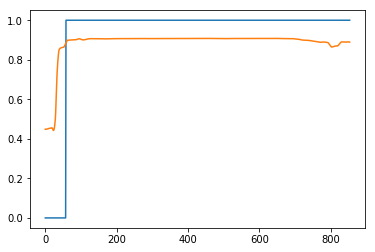

In [22]:
plt.plot(Norm_DB_output_test_DB['KAFWP2_On'])
plt.plot(out_total['KAFWP2_On'])
plt.show()

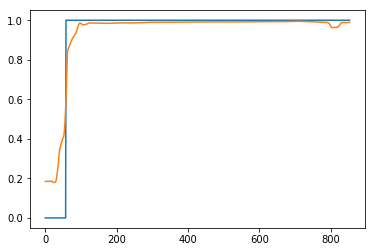

In [31]:
plt.plot(Norm_DB_output_test_DB['KAFWP2_On'])
plt.plot(out_total['KAFWP2_On'])
plt.show()